In [1]:
print('hello')

hello


In [1]:
import pickle

with open("./data/drivers.pickle", "rb") as fr:
    data = pickle.load(fr)

data


,Driver,statid,speed,statnm,chgerid,chgertype,addr,location,lat,lng,...,method,zcode,zscode,kind,kinddetail,parkingfree,note,trafficyn,Count,Cluster
0,0,13866,0,힐마루골프엔리조트 직원기숙사,01,2,경기도 포천시 영중면 금화봉4길 77,null,37.989111,127.223991,...,단독,41,41650,E0,E004,N,None,N,3,283
1,0,18993,0,삼환아파트,00,2,서울특별시 영등포구 여의대방로43나길 25,null,37.506624,126.920789,...,단독,11,11560,H0,H001,N,None,N,21,21
2,0,19451,0,캐슬앤파밀리에시티1단지,00,2,경기도 김포시 고촌읍 태리로 236,null,37.595036,126.755048,...,단독,41,41570,H0,H001,N,None,N,100,119
3,1,26639,0,분당테크노파크e동,01,2,경기도 성남시 분당구 판교로 700,E동옆 지상1층_주차장,37.404215,127.151696,...,단독,41,41130,G0,G004,N,None,N,6,323
4,1,14300,0,양주 제네시스,01,2,경기도 양주시 고삼로 109,null,37.797812,127.095626,...,단독,41,41630,E0,E004,N,None,N,2,299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667205,185334,11399,0,고덕자이아파트,09,2,서울특별시 강동구 상일로 55,null,37.552427,127.170528,...,단독,11,11740,H0,H001,Y,None,N,83,348
667206,185335,1902,1,도로교통공단 강서운전면허시험장 별관 제1주차장,01,4,서울특별시 강서구 남부순환로 171,지상1층 입구 우측 4시 방향 52m지점,37.549159,126.820214,...,동시,11,11500,A0,A003,Y,None,N,2,3
667207,185335,1413,1,에버랜드 셔틀버스 승강장,01,6,경기도 용인시 처인구 포곡읍 곡현로 76,null,37.288590,127.216361,...,단독,41,41460,E0,E003,Y,None,N,8,203
667208,185335,15731,0,동두천시 송내4공영주차장,01,2,경기도 동두천시 중앙로 110-18,지상주차장,37.890883,127.053231,...,단독,41,41250,B0,B001,Y,None,N,1,288


In [6]:
data.columns

Index(['Driver', 'statid', 'speed', 'statnm', 'chgerid', 'chgertype', 'addr',
       'location', 'lat', 'lng', 'busiid', 'bnm', 'businm', 'busicall',
       'powertype', 'output', 'method', 'zcode', 'zscode', 'kind',
       'kinddetail', 'parkingfree', 'note', 'trafficyn', 'Count', 'Cluster'],
      dtype='object')

In [7]:
data.speed

0         0
1         0
2         0
3         0
4         0
         ..
667205    0
667206    1
667207    1
667208    0
667209    1
Name: speed, Length: 667210, dtype: int64

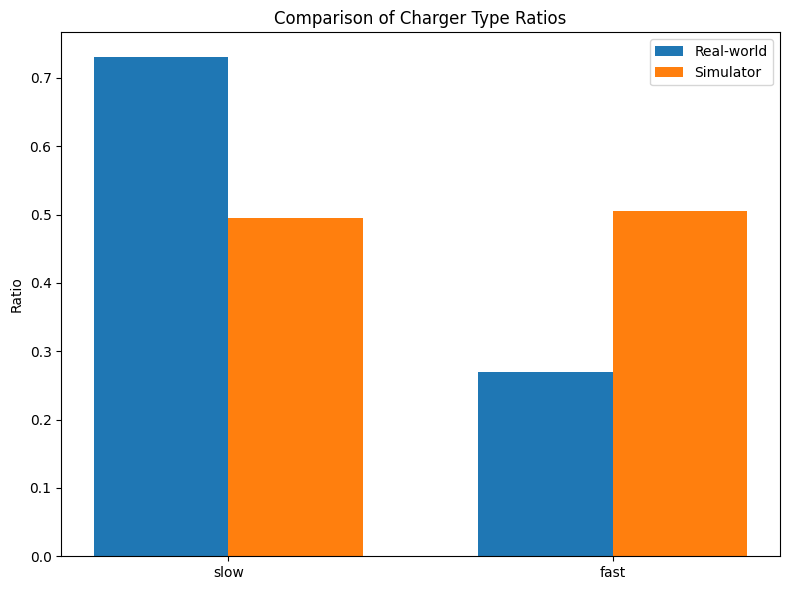

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# 실제 비율 (예시)
real_charger_ratio = {'slow': 0.73, 'fast': 0.27}

# 시뮬레이터 데이터 비율
simulated_charger_counts = data['speed'].value_counts(normalize=True)
sim_values = [simulated_charger_counts.get(1, 0), simulated_charger_counts.get(0, 0)]
real_values = [real_charger_ratio['slow'], real_charger_ratio['fast']]

labels = ['slow', 'fast']
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(8,6))
plt.bar(x - width/2, real_values, width, label='Real-world')
plt.bar(x + width/2, sim_values, width, label='Simulator')
plt.xticks(x, labels)
plt.ylabel('Ratio')
plt.title('Comparison of Charger Type Ratios')
plt.legend()
plt.tight_layout()
plt.show()


In [6]:
simulated_charger_counts

0    0.505498
1    0.494502
Name: speed, dtype: float64

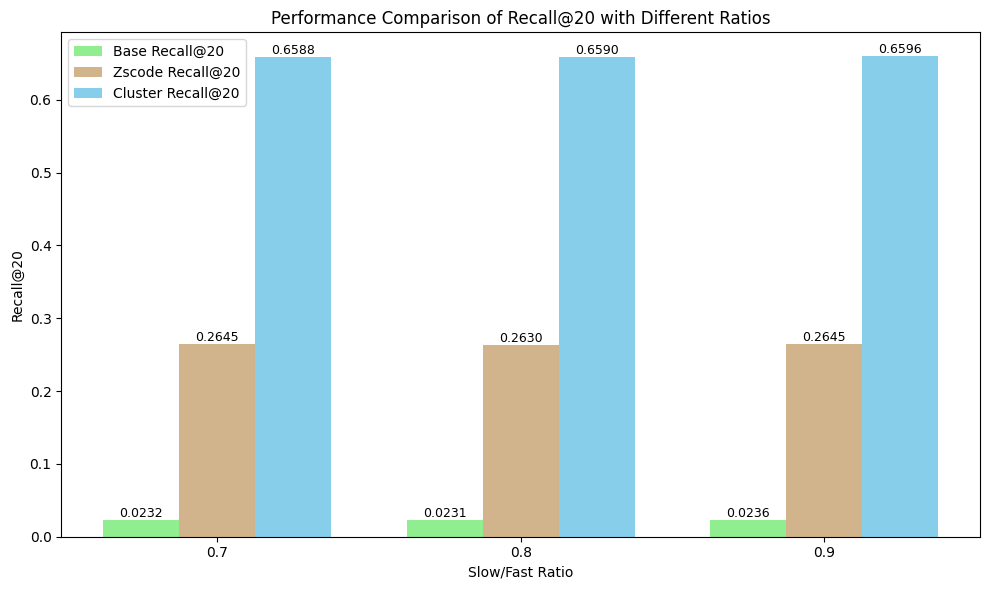

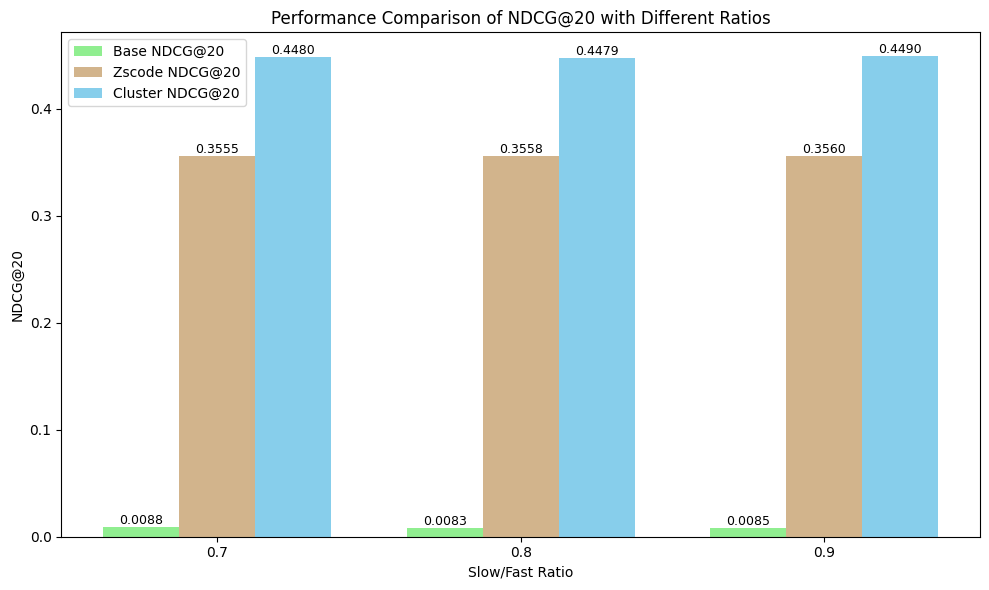

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# ---- 가상의 성능 데이터 (실험 결과로 교체하세요) ----
ratios = ['0.7', '0.8', '0.9']

# Recall@20 결과
recall_base = [0.6588, 0.6590, 0.6596]
recall_cluster = [0.2645, 0.2630, 0.2645]
recall_zscode = [0.0232, 0.0231, 0.0236]

# NDCG@20 결과
ndcg_base = [0.4480, 0.4479, 0.4490]
ndcg_cluster = [0.3555, 0.3558, 0.3560]
ndcg_zscode = [0.0088, 0.0083, 0.0085]

x = np.arange(len(ratios))
width = 0.25

def add_value_labels(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., height,
                 f'{height:.4f}', ha='center', va='bottom', fontsize=9)
        

# ---- Recall@20 그래프 ----
plt.figure(figsize=(10,6))
bars_zs = plt.bar(x - width, recall_zscode, width, label='Base Recall@20', color='lightgreen')
bars_cl = plt.bar(x, recall_cluster, width, label='Zscode Recall@20', color='tan')
bars_bs = plt.bar(x + width, recall_base, width, label='Cluster Recall@20', color='skyblue')

add_value_labels(bars_zs)
add_value_labels(bars_cl)
add_value_labels(bars_bs)

plt.xticks(x, ratios)
plt.ylabel('Recall@20')
plt.xlabel('Slow/Fast Ratio')
plt.title('Performance Comparison of Recall@20 with Different Ratios')
plt.legend()
plt.tight_layout()
plt.show()

# ---- NDCG@20 그래프 ----
plt.figure(figsize=(10,6))
bars_zs = plt.bar(x - width, ndcg_zscode, width, label='Base NDCG@20', color='lightgreen')
bars_cl = plt.bar(x, ndcg_cluster, width, label='Zscode NDCG@20', color='tan')
bars_bs = plt.bar(x + width, ndcg_base, width, label='Cluster NDCG@20', color='skyblue')

add_value_labels(bars_zs)
add_value_labels(bars_cl)
add_value_labels(bars_bs)

plt.xticks(x, ratios)
plt.ylabel('NDCG@20')
plt.xlabel('Slow/Fast Ratio')
plt.title('Performance Comparison of NDCG@20 with Different Ratios')
plt.legend()
plt.tight_layout()
plt.show()

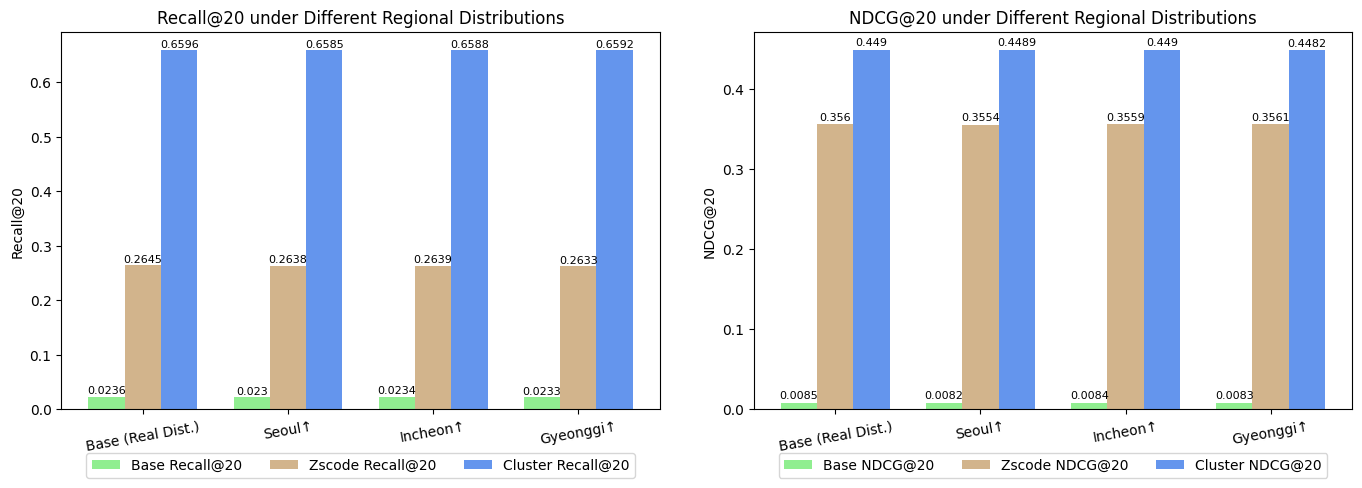

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# 실험 시나리오 라벨
regions = ['Base (Real Dist.)', 'Seoul↑', 'Incheon↑', 'Gyeonggi↑']
x = np.arange(len(regions))
width = 0.25

# 가상의 성능 값 (필요시 실제 실험값으로 교체)
recall_base = [0.6596, 0.6585, 0.6588, 0.6592]  # Cluster 기반 Recall
recall_zscode = [0.2645, 0.2638, 0.2639, 0.2633]
recall_raw = [0.0236, 0.0230, 0.0234, 0.0233]

ndcg_base = [0.4490, 0.4489, 0.4490, 0.4482]
ndcg_zscode = [0.3560, 0.3554, 0.3559, 0.3561]
ndcg_raw = [0.0085, 0.0082, 0.0084, 0.0083]

# ---- 막대 그래프 ----
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Recall@20 막대
axs[0].bar(x - width, recall_raw, width, label='Base Recall@20', color='lightgreen')
axs[0].bar(x, recall_zscode, width, label='Zscode Recall@20', color='tan')
axs[0].bar(x + width, recall_base, width, label='Cluster Recall@20', color='cornflowerblue')
axs[0].set_title('Recall@20 under Different Regional Distributions')
axs[0].set_ylabel('Recall@20')
axs[0].set_xticks(x)
axs[0].set_xticklabels(regions, rotation=10)
# axs[0].legend(loc='upper left', bbox_to_anchor=(1.05, 1))
# axs[0].legend()
axs[0].legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=3)
for i in range(len(regions)):
    axs[0].text(x[i] - width, recall_raw[i] + 0.005, f"{recall_raw[i]}", ha='center', fontsize=8)
    axs[0].text(x[i], recall_zscode[i] + 0.005, f"{recall_zscode[i]}", ha='center', fontsize=8)
    axs[0].text(x[i] + width, recall_base[i] + 0.005, f"{recall_base[i]}", ha='center', fontsize=8)

# NDCG@20 막대
axs[1].bar(x - width, ndcg_raw, width, label='Base NDCG@20', color='lightgreen')
axs[1].bar(x, ndcg_zscode, width, label='Zscode NDCG@20', color='tan')
axs[1].bar(x + width, ndcg_base, width, label='Cluster NDCG@20', color='cornflowerblue')
axs[1].set_title('NDCG@20 under Different Regional Distributions')
axs[1].set_ylabel('NDCG@20')
axs[1].set_xticks(x)
axs[1].set_xticklabels(regions, rotation=10)
axs[1].legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=3)
for i in range(len(regions)):
    axs[1].text(x[i] - width, ndcg_raw[i] + 0.005, f"{ndcg_raw[i]}", ha='center', fontsize=8)
    axs[1].text(x[i], ndcg_zscode[i] + 0.005, f"{ndcg_zscode[i]}", ha='center', fontsize=8)
    axs[1].text(x[i] + width, ndcg_base[i] + 0.005, f"{ndcg_base[i]}", ha='center', fontsize=8)

plt.tight_layout()
plt.show()

# ---- 라인 그래프 ----
# fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# # Recall@20 라인
# axs[0].plot(regions, recall_raw, marker='o', label='Base Recall@20', color='green')
# axs[0].plot(regions, recall_zscode, marker='s', label='Zscode Recall@20', color='orange')
# axs[0].plot(regions, recall_base, marker='^', label='Cluster Recall@20', color='blue')
# axs[0].set_title('Recall@20 Trend by Region Distribution')
# axs[0].set_ylabel('Recall@20')
# axs[0].legend()

# # NDCG@20 라인
# axs[1].plot(regions, ndcg_raw, marker='o', label='Base NDCG@20', color='green')
# axs[1].plot(regions, ndcg_zscode, marker='s', label='Zscode NDCG@20', color='orange')
# axs[1].plot(regions, ndcg_base, marker='^', label='Cluster NDCG@20', color='blue')
# axs[1].set_title('NDCG@20 Trend by Region Distribution')
# axs[1].set_ylabel('NDCG@20')
# # axs[1].legend()

# plt.tight_layout()
# plt.show()



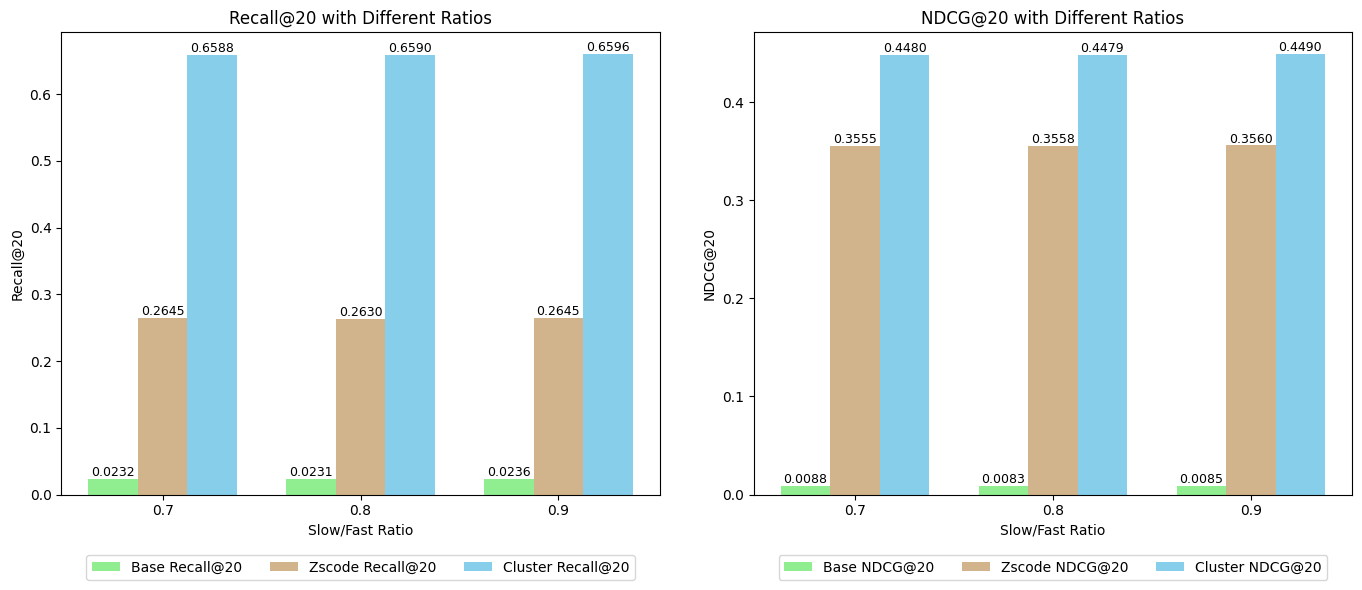

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# ---- 가상의 성능 데이터 (실험 결과로 교체하세요) ----
ratios = ['0.7', '0.8', '0.9']

# Recall@20 결과
recall_base = [0.6588, 0.6590, 0.6596]
recall_cluster = [0.2645, 0.2630, 0.2645]
recall_zscode = [0.0232, 0.0231, 0.0236]

# NDCG@20 결과
ndcg_base = [0.4480, 0.4479, 0.4490]
ndcg_cluster = [0.3555, 0.3558, 0.3560]
ndcg_zscode = [0.0088, 0.0083, 0.0085]

x = np.arange(len(ratios))
width = 0.25

def add_value_labels(ax, rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height,
                f'{height:.4f}', ha='center', va='bottom', fontsize=9)

# ---- 좌우 배열 그래프 ----
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# --- Recall@20 ---
bars_zs = axs[0].bar(x - width, recall_zscode, width, label='Base Recall@20', color='lightgreen')
bars_cl = axs[0].bar(x, recall_cluster, width, label='Zscode Recall@20', color='tan')
bars_bs = axs[0].bar(x + width, recall_base, width, label='Cluster Recall@20', color='skyblue')

axs[0].set_xticks(x)
axs[0].set_xticklabels(ratios)
axs[0].set_ylabel('Recall@20')
axs[0].set_xlabel('Slow/Fast Ratio')
axs[0].set_title('Recall@20 with Different Ratios')
axs[0].legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=3)
add_value_labels(axs[0], bars_zs)
add_value_labels(axs[0], bars_cl)
add_value_labels(axs[0], bars_bs)

# --- NDCG@20 ---
bars_zs2 = axs[1].bar(x - width, ndcg_zscode, width, label='Base NDCG@20', color='lightgreen')
bars_cl2 = axs[1].bar(x, ndcg_cluster, width, label='Zscode NDCG@20', color='tan')
bars_bs2 = axs[1].bar(x + width, ndcg_base, width, label='Cluster NDCG@20', color='skyblue')

axs[1].set_xticks(x)
axs[1].set_xticklabels(ratios)
axs[1].set_ylabel('NDCG@20')
axs[1].set_xlabel('Slow/Fast Ratio')
axs[1].set_title('NDCG@20 with Different Ratios')
axs[1].legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=3)
add_value_labels(axs[1], bars_zs2)
add_value_labels(axs[1], bars_cl2)
add_value_labels(axs[1], bars_bs2)

plt.tight_layout()
plt.show()

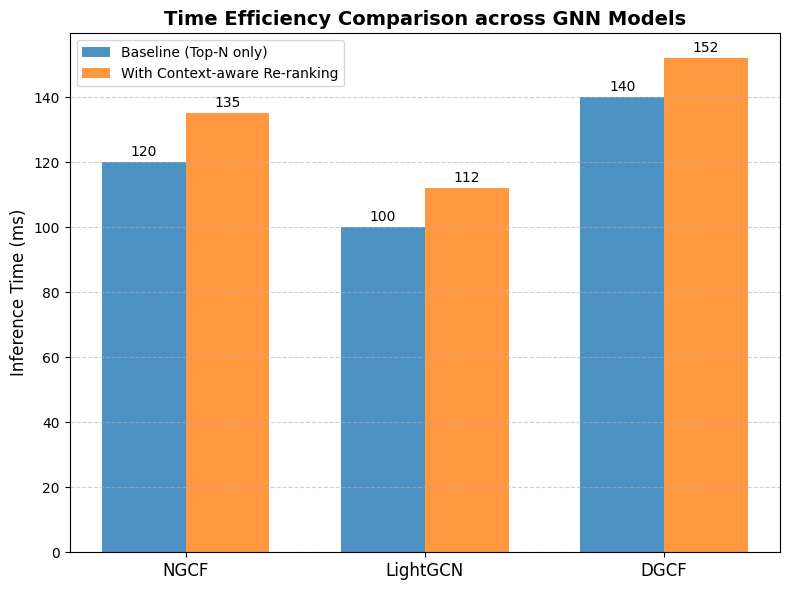

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# ★★ 여기에 실제 측정한 값 넣기 ★★
# 단위는 ms(밀리초)라고 가정
# 각 모델별 [baseline_time, re_ranking_time]
time_results = {
    'NGCF': [120, 135],        # 예시
    'LightGCN': [100, 112],    # 예시
    'DGCF': [140, 152],        # 예시
}
# -----------------------------

models = list(time_results.keys())
baseline_times = [time_results[m][0] for m in models]
re_ranking_times = [time_results[m][1] for m in models]

x = np.arange(len(models))
bar_width = 0.35

plt.figure(figsize=(8,6))
plt.bar(x - bar_width/2, baseline_times, width=bar_width, label='Baseline (Top-N only)', alpha=0.8)
plt.bar(x + bar_width/2, re_ranking_times, width=bar_width, label='With Context-aware Re-ranking', alpha=0.8)

# 레이블 및 꾸미기
plt.xticks(x, models, fontsize=12)
plt.ylabel('Inference Time (ms)', fontsize=12)
plt.title('Time Efficiency Comparison across GNN Models', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# 각 막대 위에 수치 표시
for i, v in enumerate(baseline_times):
    plt.text(i - bar_width/2, v + 2, f'{v}', ha='center', fontsize=10)
for i, v in enumerate(re_ranking_times):
    plt.text(i + bar_width/2, v + 2, f'{v}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


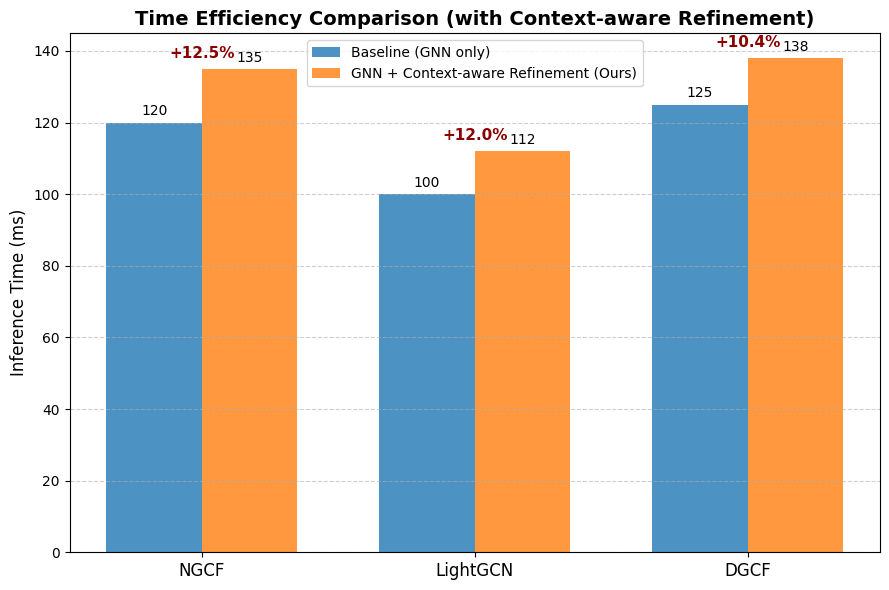

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# ---------------------------------------
# ★ 실제 측정값으로 교체하면 됨 ★
# baseline_time: GNN inference 후 Top-N 결과를 뽑기까지 걸린 시간
# context_time: GNN inference + context-aware refinement까지 포함한 시간
time_results = {
    'NGCF': [120, 135],       # [baseline_time, context-aware_total_time]
    'LightGCN': [100, 112],
    'DGCF': [125, 138],
}
# ---------------------------------------

models = list(time_results.keys())
baseline_times = [time_results[m][0] for m in models]
context_times = [time_results[m][1] for m in models]

x = np.arange(len(models))
bar_width = 0.35

plt.figure(figsize=(9,6))
bars1 = plt.bar(x - bar_width/2, baseline_times, width=bar_width, label='Baseline (GNN only)', alpha=0.8)
bars2 = plt.bar(x + bar_width/2, context_times, width=bar_width, label='GNN + Context-aware Refinement (Ours)', alpha=0.8)

plt.xticks(x, models, fontsize=12)
plt.ylabel('Inference Time (ms)', fontsize=12)
plt.title('Time Efficiency Comparison (with Context-aware Refinement)', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# 막대 위에 수치 + 증가율 표시
for i, (base, ctx) in enumerate(zip(baseline_times, context_times)):
    # baseline
    plt.text(i - bar_width/2, base + 2, f'{base}', ha='center', fontsize=10)
    # context-aware
    plt.text(i + bar_width/2, ctx + 2, f'{ctx}', ha='center', fontsize=10)
    # 증가율
    increase_pct = ((ctx - base) / base) * 100
    plt.text(i, max(base, ctx) + 3, f'+{increase_pct:.1f}%', ha='center', fontsize=11, color='darkred', fontweight='bold')

plt.tight_layout()
plt.show()
